In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
from helper_functions import load_data
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_lg")

def count_chars(text):
    return len(text)

def count_words(text):
    return len(text.split())

def count_capital_words(text):
    return sum(map(str.isupper, text.split()))

def count_sent(text):
    return len(nltk.sent_tokenize(text))

def count_unique_words(text):
    return len(set(text.split()))

def count_stopwords(text):
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)

def preprocess(sent):
    sent = sent.lower() # lower case
    sent = re.sub('\s+', ' ', sent) # remove double spacing
    sent = re.sub('([0-9]+)', '', sent) # remove numbers
    sent_token_list = [word for word in sent.split(' ')]
    sent = ' '.join(sent_token_list)
    return sent

def count_direct_objects(text):
    print("Processing ...")
    doc_text = nlp(text)
    direct_object_counts = 0
    print("POS tagging and counting direct objects ...")
    for chunk in doc_text.noun_chunks:
        if chunk.root.dep_ == 'dobj':
            direct_object_counts += 1
    return(direct_object_counts)

# Load the data
text_data, labels = load_data('data')
df = pd.DataFrame(list(zip(text_data, labels)), columns=['text_data', 'label'])

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2)

'''
for idx, row in train_df.iterrows():
    train_df.loc[idx, 'chars'] = count_chars(row['text_data'])
    train_df.loc[idx, 'words'] = count_words(row['text_data'])
    train_df.loc[idx, 'capital_words'] = count_capital_words(row['text_data'])
    train_df.loc[idx, 'sentence_count'] = count_sent(row['text_data'])
    train_df.loc[idx, 'unique_words'] = count_unique_words(row['text_data'])
    train_df.loc[idx, 'stopwords_count'] = count_stopwords(row['text_data'])
    train_df.loc[idx, 'direct_objects_count'] = count_direct_objects(row['text_data'])

for idx, row in test_df.iterrows():
    test_df.loc[idx, 'chars'] = count_chars(row['text_data'])
    test_df.loc[idx, 'words'] = count_words(row['text_data'])
    test_df.loc[idx, 'capital_words'] = count_capital_words(row['text_data'])
    test_df.loc[idx, 'sentence_count'] = count_sent(row['text_data'])
    test_df.loc[idx, 'unique_words'] = count_unique_words(row['text_data'])
    test_df.loc[idx, 'stopwords_count'] = count_stopwords(row['text_data'])
    test_df.loc[idx, 'direct_objects_count'] = count_direct_objects(row['text_data']) 
'''

# add engineered features with numerical indices
train_df['feat_0'] = train_df['text_data'].apply(count_chars)
train_df['feat_1'] = train_df['text_data'].apply(count_words)
train_df['feat_2'] = train_df['text_data'].apply(count_capital_words)
train_df['feat_3'] = train_df['text_data'].apply(count_sent)
train_df['feat_4'] = train_df['text_data'].apply(count_unique_words)
train_df['feat_5'] = train_df['text_data'].apply(count_stopwords)
train_df['feat_6'] = train_df['text_data'].apply(count_direct_objects)

test_df['feat_0'] = test_df['text_data'].apply(count_chars)
test_df['feat_1'] = test_df['text_data'].apply(count_words)
test_df['feat_2'] = test_df['text_data'].apply(count_capital_words)
test_df['feat_3'] = test_df['text_data'].apply(count_sent)
test_df['feat_4'] = test_df['text_data'].apply(count_unique_words)
test_df['feat_5'] = test_df['text_data'].apply(count_stopwords)
test_df['feat_6'] = test_df['text_data'].apply(count_direct_objects)

# Create a TfidfVectorizer object and fit it on the training data
vectorizer = TfidfVectorizer()
train_tf_idf = vectorizer.fit_transform(train_df['text_data']).toarray()

# Apply the same vectorizer to the test data
test_tf_idf = vectorizer.transform(test_df['text_data']).toarray()
# Combine the tf-idf features with other engineered features
engineered_features = ['feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6']
train_X = np.concatenate([train_tf_idf, train_df[engineered_features].values], axis=1)
test_X = np.concatenate([test_tf_idf, test_df[engineered_features].values], axis=1)

'''
# Combine the tf-idf features with other engineered features
train_X = np.concatenate([train_tf_idf, train_df[['chars', 'words', 'capital_words', 'sentence_count', 'unique_words', 'stopwords_count', 'direct_objects_count']].values], axis=1)
test_X = np.concatenate([test_tf_idf, test_df[['chars', 'words', 'capital_words', 'sentence_count', 'unique_words', 'stopwords_count', 'direct_objects_count']].values], axis=1)
'''

# Extract the labels for the training and test sets
train_Y = train_df['label']
test_Y = test_df['label']

# Train a random forest classifier
rf = RandomForestClassifier()
rf.fit(train_X, train_Y)

# Predict the labels for the test set
pred_Y = rf.predict(test_X)

# Print the classification report and confusion matrix
print(classification_report(test_Y, pred_Y))
print(confusion_matrix(test_Y, pred_Y))

c:\Users\KSpicer\Anaconda3\envs\python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


Processing file: fitzgerald_all_the_sad.txt
Processing file: fitzgerald_bablyon_revisited.txt
Processing file: fitzgerald_beautiful_and_damned.txt
Processing file: fitzgerald_flappers_and_philosophers.txt
Processing file: fitzgerald_gatsby.txt
Processing file: fitzgerald_tales_jazz_age.txt
Processing file: fitzgerald_tender_is.txt
Processing file: fitzgerald_the_vegtable.txt
Processing file: fitzgerald_this_side.txt
Processing file: hemingway_across_the_river.txt
Processing file: hemingway_bell_tolls.txt
Processing file: hemingway_farewell.txt
Processing file: hemingway_green_hills_africa.txt
Processing file: hemingway_in_our_time.txt
Processing file: hemingway_men_without_women.txt
Processing file: hemingway_old_man.txt
Processing file: hemingway_sun_also.txt
Processing file: hemingway_three_stories_ten_poems.txt
Processing file: hemingway_winner_take_nothing.txt
Processing file: fitzgerald_all_the_sad.txt
Processing file: fitzgerald_bablyon_revisited.txt
Processing file: fitzgerald_b

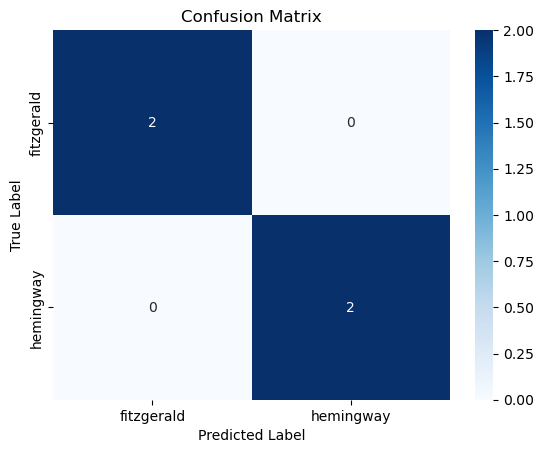

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# assume cm is the confusion matrix
cm = confusion_matrix(test_Y, pred_Y)

# create a list of class labels
classes = ['fitzgerald', 'hemingway']

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [3]:
importances = rf.feature_importances_

# Sort the features by their importance
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_tf_idf.shape[1]):
    print(f"{f+1}. feature {indices[f]} ({importances[indices[f]]})")

Feature ranking:
1. feature 28391 (0.02)
2. feature 20336 (0.02)
3. feature 14629 (0.02)
4. feature 25259 (0.015275297619047619)
5. feature 25217 (0.012380952380952381)
6. feature 3300 (0.01)
7. feature 9189 (0.01)
8. feature 10331 (0.01)
9. feature 8606 (0.01)
10. feature 26973 (0.01)
11. feature 12742 (0.01)
12. feature 8563 (0.01)
13. feature 14617 (0.01)
14. feature 22764 (0.01)
15. feature 25151 (0.01)
16. feature 19928 (0.01)
17. feature 4937 (0.01)
18. feature 27070 (0.01)
19. feature 12816 (0.01)
20. feature 28018 (0.01)
21. feature 11111 (0.01)
22. feature 3117 (0.01)
23. feature 10371 (0.01)
24. feature 2084 (0.01)
25. feature 23613 (0.01)
26. feature 6938 (0.01)
27. feature 5423 (0.01)
28. feature 19414 (0.01)
29. feature 7258 (0.01)
30. feature 5462 (0.01)
31. feature 7284 (0.01)
32. feature 1975 (0.01)
33. feature 12247 (0.01)
34. feature 10810 (0.01)
35. feature 19723 (0.01)
36. feature 19278 (0.01)
37. feature 10443 (0.01)
38. feature 2030 (0.01)
39. feature 24663 (0.01)

In [4]:
def get_top_n_features(feature_importances, feature_names, n):
    # Create a list of tuples with feature names and importance scores
    features = list(zip(feature_names, feature_importances))

    # Sort the list by importance score in descending order
    features.sort(key=lambda x: x[1], reverse=True)

    # Return the top n features
    return features[:n]

top_features = get_top_n_features(rf.feature_importances_, vectorizer.get_feature_names_out(), n=25)
print(top_features)

[('laughter', 0.02), ('realizing', 0.02), ('years', 0.02), ('terrible', 0.015275297619047619), ('tense', 0.012380952380952381), ('an', 0.01), ('answer', 0.01), ('anyways', 0.01), ('appended', 0.01), ('begun', 0.01), ('big', 0.01), ('changed', 0.01), ('clearing', 0.01), ('climb', 0.01), ('consoling', 0.01), ('cracked', 0.01), ('cut', 0.01), ('deal', 0.01), ('declared', 0.01), ('defeat', 0.01), ('defiant', 0.01), ('discretion', 0.01), ('doll', 0.01), ('drawn', 0.01), ('driving', 0.01)]


In [5]:
feature_names = vectorizer.get_feature_names_out()

# Create a mapping between feature indices and feature names
feature_mapping = {}
for feature_index in range(len(feature_names)):
    feature_mapping[feature_index] = feature_names[feature_index]

# Print out the feature mapping
print(feature_mapping)

{0: '00', 1: '000', 2: '02', 3: '10', 4: '100', 5: '100678', 6: '105', 7: '1088', 8: '11', 9: '11th', 10: '11th_', 11: '12', 12: '13', 13: '1300', 14: '1305', 15: '132', 16: '1335', 17: '137th', 18: '14', 19: '15', 20: '158th', 21: '16', 22: '17', 23: '1700', 24: '171st', 25: '1769', 26: '1776', 27: '17th', 28: '18', 29: '1831', 30: '1834', 31: '1846', 32: '1860', 33: '1861', 34: '1864', 35: '1868', 36: '1870', 37: '1880', 38: '1890', 39: '1895', 40: '1898', 41: '1899', 42: '19', 43: '1900', 44: '1902', 45: '1906', 46: '1907', 47: '1908', 48: '1909', 49: '1910', 50: '1911', 51: '1912', 52: '1913', 53: '1914', 54: '1915', 55: '1917', 56: '1918', 57: '1919', 58: '1920', 59: '1921', 60: '1922', 61: '1925', 62: '1929', 63: '1933', 64: '1934', 65: '1942', 66: '1st_', 67: '20', 68: '200', 69: '201', 70: '206', 71: '20th_', 72: '21', 73: '2127', 74: '2145', 75: '21st_', 76: '22', 77: '220', 78: '23', 79: '238', 80: '24', 81: '240', 82: '24th_', 83: '25', 84: '26', 85: '27', 86: '28', 87: '29'

In [6]:
feature_importances = rf.feature_importances_
feature_importance_dict = {}
desired_features = ['feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6']

for feature, importance in zip(desired_features, feature_importances):
    feature_importance_dict[feature] = importance

# Print the feature importances
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")


feat_0: 0.0
feat_1: 0.0
feat_2: 0.0
feat_3: 0.0
feat_4: 0.0
feat_5: 0.0
feat_6: 0.0


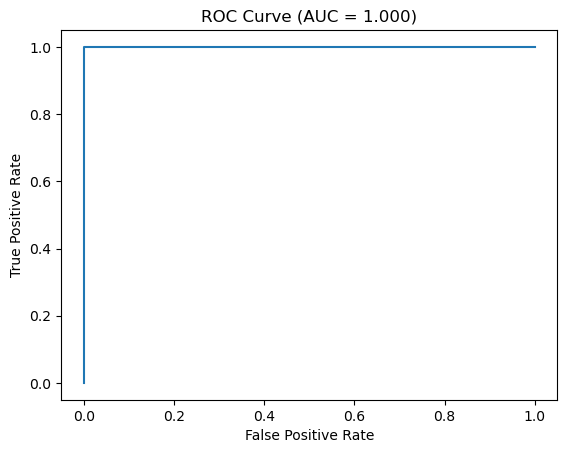

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities for test set
probs = rf.predict_proba(test_X)[:, 1]

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_Y, probs)

# calculate AUC score
auc = roc_auc_score(test_Y, probs)

# plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.3f})'.format(auc))
plt.show()

In [10]:
# Load the dataset
# Split the data into training and testing sets
train_df = df.sample(frac=0.8, random_state=1)
test_df = df.drop(train_df.index)

# Define the additional features to extract
custom_features = {
    'feat_0': count_chars,
    'feat_1': count_words,
    'feat_2': count_capital_words,
    'feat_3': count_sent,
    'feat_4': count_unique_words,
    'feat_5': count_stopwords,
    'feat_6': count_direct_objects
}

# Add the additional features to the dataset
for feature_name, feature_func in custom_features.items():
    train_df['feat_'+feature_name] = train_df['text_data'].apply(feature_func)
    test_df['feat_'+feature_name] = test_df['text_data'].apply(feature_func)

# Define the features to use in the model
desired_features = ['feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6']

# Create a TfidfVectorizer object and fit it on the training data
vectorizer = TfidfVectorizer()
train_tf_idf = vectorizer.fit_transform(train_df['text_data']).toarray()

# Combine the tf-idf features with other engineered features
train_X = np.concatenate([train_tf_idf, train_df[desired_features].values], axis=1)
train_y = train_df['category'].values

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(train_X, train_y)

# Get the feature importances
feature_importances = rf.feature_importances_

# Create a dictionary of feature names and importances
feature_names = vectorizer.get_feature_names() + desired_features
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Print the feature importances
for feature, importance in feature_importance_dict.items():
    print(feature + ':', importance)

# Evaluate the model on the test set
test_tf_idf = vectorizer.transform(test_df['text_data']).toarray()
test_X = np.concatenate([test_tf_idf, test_df[desired_features].values], axis=1)
test_y = test_df['category'].values
pred_y = rf.predict(test_X)

Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects .

KeyError: "None of [Index(['feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6'], dtype='object')] are in the [columns]"